# Coverage Guided Fuzzer
### Smarter way to create fuzzed input for python program

#### Steps to create the fuzzer

1. We maintain a population (i.e., a list of seeds) that we use for mutation. Each seed in the population will be an input that provide additional coverage information.
2. We will take a seed from the population and fuzz the seed to test the program. If the population is empty, we mutate an initial seed that we provide manually.
3. We take the seed from the population semi-randomly, but the seeds that provided more additional coverage have a higher chance of being selected.
4. If the new input increased the coverage, we add this new input to the population as a new seed. We assign a score to the seed (i.e., how much coverage it improved).
5. We repeat and go back to Step 2 until we execute the fuzzer 100 times (i.e., your pre-defined number of trials).

#### Testing the fuzzer

+  We run our fuzzer on 3 Python programs
    - Differentiate network using Subnet
    - Credit Card Validation
    - RSA Encryption
    
+ Evaluate the programs on different fuzzing approaches:
    - Pure Randomly Fuzzing Approach
    - Semi Randomly Fuzzing Approach
    - Mutation Fuzzing Approach
    - Coverage Guided Fuzzing Approach- smarter way to create fuzzed input

+ We discuss and compare each fuzzing approach in terms of coverage.
+ We plot how the coverage increases for the inputs that we tried.
+ We also record any bug found in our program.

## References

1. https://github.com/geekcomputers/Python


# Differentiate Network using Subnet

#### Description: 

+ This program calculates the network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet from the given IP address and subnet mask.

#### Input: The program takes 2 inputs- 

+ String- IP Address
+ String- Subnet mask

#### Output: 

+ Prints the calculated network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet.
+ If the given IP Address or Subnet mask is invalid, the program will end. 

#### Metrics:

+ SLOC- 69
+ Comments- 34
+ McCabe- 19

In [1]:
import random
import sys
def subnet_calc(ip_address, subnet_mask):

        #Checking IP address validity
    while True:

            #Checking octets            
        a = ip_address.split('.')

        if (len(a) == 4) and (1 <= int(a[0]) <= 223) and (int(a[0]) != 127) and (int(a[0]) != 169 or int(a[1]) != 254) and (0 <= int(a[1]) <= 255 and 0 <= int(a[2]) <= 255 and 0 <= int(a[3]) <= 255):
            break

        else:
            raise ValueError("Invalid IP Address")
            

    masks = [255, 254, 252, 248, 240, 224, 192, 128, 0]

        #Checking Subnet Mask validity
    while True:

            #Checking octets            
        b = subnet_mask.split('.')

        if (len(b) == 4) and (int(b[0]) == 255) and (int(b[1]) in masks) and (int(b[2]) in masks) and (int(b[3]) in masks) and (int(b[0]) >= int(b[1]) >= int(b[2]) >= int(b[3])):
            break

        else:
            raise ValueError("Invalid subnet Mask")

	############# Application #1 - Part #2 #############

        #Algorithm for subnet identification, based on IP and Subnet Mask

        #Convert mask to binary string
    mask_octets_padded = []
    mask_octets_decimal = subnet_mask.split(".")
        #print mask_octets_decimal

    for octet_index in range(0, len(mask_octets_decimal)):

            #print bin(int(mask_octets_decimal[octet_index]))

        binary_octet = bin(int(mask_octets_decimal[octet_index])).split("b")[1]
            #print binary_octet

        if len(binary_octet) == 8:
            mask_octets_padded.append(binary_octet)

        elif len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            mask_octets_padded.append(binary_octet_padded)

        #print mask_octets_padded

    decimal_mask = "".join(mask_octets_padded)
        #print decimal_mask   #Example: for 255.255.255.0 => 11111111111111111111111100000000

        #Counting host bits in the mask and calculating number of hosts/subnet
    no_of_zeros = decimal_mask.count("0")
    no_of_ones = 32 - no_of_zeros
    no_of_hosts = abs(2 ** no_of_zeros - 2) #return positive value for mask /32

        #print no_of_zeros
        #print no_of_ones
        #print no_of_hosts

        #Obtaining wildcard mask
    wildcard_octets = []
    for w_octet in mask_octets_decimal:
        wild_octet = 255 - int(w_octet)
        wildcard_octets.append(str(wild_octet))

        #print wildcard_octets

    wildcard_mask = ".".join(wildcard_octets)
        #print wildcard_mask

        ############# Application #1 - Part #3 #############

        #Convert IP to binary string
    ip_octets_padded = []
    ip_octets_decimal = ip_address.split(".")

    for octet_index in range(0, len(ip_octets_decimal)):

        binary_octet = bin(int(ip_octets_decimal[octet_index])).split("b")[1]

        if len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            ip_octets_padded.append(binary_octet_padded)

        else:
            ip_octets_padded.append(binary_octet)

        #print ip_octets_padded

    binary_ip = "".join(ip_octets_padded)

        #print binary_ip   #Example: for 192.168.2.100 => 11000000101010000000001001100100

        #Obtain the network address and broadcast address from the binary strings obtained above

    network_address_binary = binary_ip[:(no_of_ones)] + "0" * no_of_zeros
        #print network_address_binary

    broadcast_address_binary = binary_ip[:(no_of_ones)] + "1" * no_of_zeros
        #print broadcast_address_binary

    net_ip_octets = []
    for octet in range(0, len(network_address_binary), 8):
        net_ip_octet = network_address_binary[octet:octet+8]
        net_ip_octets.append(net_ip_octet)

        #print net_ip_octets

    net_ip_address = []
    for each_octet in net_ip_octets:
        net_ip_address.append(str(int(each_octet, 2)))

        #print net_ip_address

    network_address = ".".join(net_ip_address)
        #print network_address

    bst_ip_octets = []
    for octet in range(0, len(broadcast_address_binary), 8):
        bst_ip_octet = broadcast_address_binary[octet:octet+8]
        bst_ip_octets.append(bst_ip_octet)

        #print bst_ip_octets

    bst_ip_address = []
    for each_octet in bst_ip_octets:
        bst_ip_address.append(str(int(each_octet, 2)))

        #print bst_ip_address

    broadcast_address = ".".join(bst_ip_address)
        #print broadcast_address

        #Results for selected IP/mask
    print ("\n")
    print("Network address is: %s" % network_address)
    print("Broadcast address is: %s" % broadcast_address)
    print("Number of valid hosts per subnet: %s" % no_of_hosts)
    print("Wildcard mask: %s" % wildcard_mask)
    print("Mask bits: %s" % no_of_ones)
    
    return True



In [2]:
#Calling the function
subnet_calc("1.1.1.1", "255.255.255.0")



Network address is: 1.1.1.0
Broadcast address is: 1.1.1.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


True

In [3]:
def is_valid_ip_subnet(ip_address, subnet_mask):
    try:
        result = subnet_calc(ip_address, subnet_mask)
        return True
    except ValueError:
        return False

## Random Fuzzer for Subnet Calculator

## Concept

+ IP version 4 has 32 bits. It is divided into 4 octets, where each octet consists of 8 bits. To make life easier for humans, these bits are converted into decimals. The bits can either be 0 or 1. So in an octet, it can start with 00000000 or 11111111 which when converted into decimals can be 0 or 255 respectively. The subnet mask helps us to identify the network of an IP. The subnet mask or the IP address cannot exceed 255 in one octet. IP version 4 has 5 classes and based on the classes, it's subnet mask is decided. This particular way of giving subnet mask is called FLSM (Fixed length subnet mask). 

    - Class A- 255.0.0.0
    - Class B- 255.255.0.0
    - Class C- 255.255.255.0

+ We also have VLSM (Variable length subnet mask). It was introduced to reduce the wasteage of IP. The decimal numbers 128, 192, 224, 240, 248, 252 and 254 are also valid if and only if it's previous octet is 255 and it's next octets/octet is 0. Thus the total number of inputs is 256^4 since it is 32 bits, which is approximately 4.9 Billion and the valid input is just 28. 

+ When we use random fuzzing method, we should have higher computation power to try 4.9 Billion trials and system will give output only for 28 trials. 
    
## Random Fuzzer Approach 1

+ When it comes to randomization, in our 1st approach we are going to randomize numbers in all 4 octets. We are planning to 1000 trials. In this case, the chance of getting a valid subnet mask is extremely low. 

## Random Fuzzer Approach 2

+ We are going to do 1000 trials. So, instead of randomizing all the 4 octets we are going to first fix the 3rd and 4th octet as 0 and we are going to randomize only the 1st and 2nd octet. Thus, we will get atleast one desired output in 256 runs which is the maximum. 
+ Similarly we do it for the 2nd, 3rd and 4th octet. By this method, we can atleast have 1 desired output.

In [4]:
#1 Pure Randomly fuzzing Approach for IP address and Subnet mask

# generate random value in the range of 0 to 255

def pure_random_ip_fuzz(int_start=0, int_range=1000):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

In [5]:
pure_random_ip_fuzz()

'401.580.402.955'

In [6]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = pure_random_ip_fuzz()
    input_subnet= pure_random_ip_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 778.98.410.366
input Subet Mask is 350.608.836.257

input IP Address is 929.98.474.63
input Subet Mask is 674.476.70.861

input IP Address is 905.233.253.806
input Subet Mask is 719.996.75.763

input IP Address is 644.888.554.461
input Subet Mask is 559.981.557.309

input IP Address is 908.901.96.448
input Subet Mask is 973.161.27.961

input IP Address is 800.380.459.786
input Subet Mask is 350.634.266.702

input IP Address is 962.968.783.652
input Subet Mask is 404.120.28.60

input IP Address is 552.164.522.672
input Subet Mask is 132.713.942.291

input IP Address is 779.324.566.142
input Subet Mask is 872.362.91.757

input IP Address is 404.938.233.892
input Subet Mask is 964.927.448.262

input IP Address is 141.751.388.571
input Subet Mask is 334.290.193.790

input IP Address is 54.923.120.963
input Subet Mask is 77.456.190.996

input IP Address is 951.884.563.332
input Subet Mask is 878.309.46.457

input IP Address is 407.783.83.158
input Subet Mask is 544.833.6

input IP Address is 677.660.540.415
input Subet Mask is 461.132.505.440

input IP Address is 457.553.381.319
input Subet Mask is 134.454.452.774

input IP Address is 374.618.578.309
input Subet Mask is 763.87.873.151

input IP Address is 516.389.126.58
input Subet Mask is 872.27.813.70

input IP Address is 586.836.640.793
input Subet Mask is 496.26.223.315

input IP Address is 645.653.173.201
input Subet Mask is 349.307.674.400

input IP Address is 311.56.87.457
input Subet Mask is 720.728.384.431

input IP Address is 898.316.75.235
input Subet Mask is 619.939.13.994

input IP Address is 965.588.42.893
input Subet Mask is 761.607.716.607

input IP Address is 724.392.292.287
input Subet Mask is 162.932.265.164

input IP Address is 378.254.326.944
input Subet Mask is 114.116.911.670

input IP Address is 614.887.521.186
input Subet Mask is 47.272.894.913

input IP Address is 241.926.340.239
input Subet Mask is 819.837.381.635

input IP Address is 562.816.734.668
input Subet Mask is 923.64

input IP Address is 372.82.454.815
input Subet Mask is 521.918.333.363

input IP Address is 194.550.364.220
input Subet Mask is 760.398.527.104

input IP Address is 402.813.471.497
input Subet Mask is 346.398.991.603

input IP Address is 509.116.448.242
input Subet Mask is 668.895.394.141

input IP Address is 388.406.988.846
input Subet Mask is 193.587.518.553

input IP Address is 989.783.91.598
input Subet Mask is 213.312.95.123

input IP Address is 433.755.715.150
input Subet Mask is 100.296.256.545

input IP Address is 582.462.723.124
input Subet Mask is 388.33.70.893

input IP Address is 523.667.842.273
input Subet Mask is 815.320.965.904

input IP Address is 609.455.617.40
input Subet Mask is 479.285.417.23

input IP Address is 370.229.169.309
input Subet Mask is 595.951.438.352

input IP Address is 168.945.206.366
input Subet Mask is 165.666.490.889

input IP Address is 528.788.850.131
input Subet Mask is 352.614.247.68

input IP Address is 846.353.215.971
input Subet Mask is 783


input IP Address is 120.343.449.269
input Subet Mask is 731.222.458.893

input IP Address is 765.540.426.228
input Subet Mask is 720.697.992.521

input IP Address is 563.467.362.881
input Subet Mask is 473.470.753.990

input IP Address is 301.903.968.47
input Subet Mask is 752.427.888.438

input IP Address is 953.468.61.817
input Subet Mask is 478.69.583.265

input IP Address is 859.568.253.259
input Subet Mask is 736.169.328.747

input IP Address is 677.928.605.921
input Subet Mask is 81.394.169.769

input IP Address is 574.102.294.341
input Subet Mask is 694.841.869.186

input IP Address is 687.932.83.292
input Subet Mask is 323.449.170.245

input IP Address is 920.715.201.498
input Subet Mask is 801.693.339.928

input IP Address is 471.100.557.883
input Subet Mask is 536.180.475.6

input IP Address is 572.192.420.243
input Subet Mask is 203.77.673.57

input IP Address is 264.328.893.812
input Subet Mask is 90.309.979.465

input IP Address is 994.966.366.608
input Subet Mask is 765.

input Subet Mask is 164.192.892.50

input IP Address is 779.61.844.848
input Subet Mask is 630.295.543.701

input IP Address is 834.289.28.717
input Subet Mask is 562.459.116.524

input IP Address is 576.679.65.700
input Subet Mask is 678.362.581.757

input IP Address is 170.779.885.769
input Subet Mask is 740.81.73.332

input IP Address is 38.351.100.585
input Subet Mask is 134.260.889.792

input IP Address is 491.408.417.815
input Subet Mask is 631.799.766.87

input IP Address is 793.783.556.220
input Subet Mask is 399.475.971.472

input IP Address is 203.230.527.565
input Subet Mask is 121.118.178.304

input IP Address is 467.138.218.869
input Subet Mask is 152.877.30.879

input IP Address is 686.188.543.382
input Subet Mask is 752.963.729.550

input IP Address is 917.879.166.808
input Subet Mask is 900.998.307.418

input IP Address is 676.992.784.965
input Subet Mask is 859.522.755.187

input IP Address is 186.931.235.540
input Subet Mask is 102.846.719.200

input IP Address is 65.

0.0

### Result- IP will be valid while subnet mask is invalid

+ So in the next random approach, we will restructure the subnet mask fuzz algorithm

In [7]:
#2 Semi Randomly fuzzing approach for Subnet mask

# generate random value in the range of 0 to 255

def semi_random_ip_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

def semi_random_subnet_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,2):
        ip+=str(random.randrange(int_start, int_start+int_range))
        ip+="."
    ip+="0.0"
    return ip

In [8]:
semi_random_subnet_fuzz()


'120.7.0.0'

In [9]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = semi_random_ip_fuzz()
    input_subnet= semi_random_subnet_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 236.247.165.248
input Subet Mask is 225.24.0.0

input IP Address is 39.146.193.113
input Subet Mask is 242.196.0.0

input IP Address is 188.94.233.246
input Subet Mask is 31.194.0.0

input IP Address is 115.57.100.22
input Subet Mask is 144.135.0.0

input IP Address is 149.35.229.97
input Subet Mask is 128.97.0.0

input IP Address is 162.111.223.59
input Subet Mask is 63.73.0.0

input IP Address is 12.186.140.127
input Subet Mask is 147.26.0.0

input IP Address is 135.196.186.171
input Subet Mask is 132.19.0.0

input IP Address is 7.123.12.86
input Subet Mask is 136.226.0.0

input IP Address is 110.168.178.25
input Subet Mask is 11.50.0.0

input IP Address is 176.67.30.94
input Subet Mask is 17.186.0.0

input IP Address is 24.116.192.143
input Subet Mask is 38.2.0.0

input IP Address is 186.94.58.137
input Subet Mask is 46.156.0.0

input IP Address is 130.245.17.31
input Subet Mask is 226.83.0.0

input IP Address is 109.95.116.183
input Subet Mask is 50.221.0.0

inp

input IP Address is 126.45.242.131
input Subet Mask is 48.126.0.0

input IP Address is 59.73.85.156
input Subet Mask is 141.64.0.0

input IP Address is 7.135.243.70
input Subet Mask is 198.201.0.0

input IP Address is 221.108.149.229
input Subet Mask is 236.155.0.0

input IP Address is 113.26.89.231
input Subet Mask is 183.0.0.0

input IP Address is 128.147.0.252
input Subet Mask is 240.204.0.0

input IP Address is 81.66.74.228
input Subet Mask is 242.216.0.0

input IP Address is 215.30.127.157
input Subet Mask is 102.25.0.0

input IP Address is 122.179.0.241
input Subet Mask is 135.147.0.0

input IP Address is 20.255.124.103
input Subet Mask is 75.158.0.0

input IP Address is 193.193.69.84
input Subet Mask is 187.187.0.0

input IP Address is 253.29.206.168
input Subet Mask is 10.83.0.0

input IP Address is 24.222.165.112
input Subet Mask is 239.244.0.0

input IP Address is 144.232.8.76
input Subet Mask is 245.223.0.0

input IP Address is 101.12.155.123
input Subet Mask is 198.176.0.0


input IP Address is 53.39.97.130
input Subet Mask is 70.61.0.0

input IP Address is 22.186.244.233
input Subet Mask is 205.105.0.0

input IP Address is 55.214.80.248
input Subet Mask is 199.161.0.0

input IP Address is 142.46.254.247
input Subet Mask is 156.190.0.0

input IP Address is 48.149.246.183
input Subet Mask is 24.17.0.0

input IP Address is 50.143.25.77
input Subet Mask is 45.88.0.0

input IP Address is 47.218.21.83
input Subet Mask is 14.175.0.0

input IP Address is 231.59.157.30
input Subet Mask is 118.170.0.0

input IP Address is 45.202.8.149
input Subet Mask is 227.47.0.0

input IP Address is 252.21.64.98
input Subet Mask is 254.135.0.0

input IP Address is 57.187.44.137
input Subet Mask is 137.168.0.0

input IP Address is 175.161.164.212
input Subet Mask is 25.192.0.0

input IP Address is 226.151.33.125
input Subet Mask is 58.170.0.0

input IP Address is 132.52.119.248
input Subet Mask is 243.254.0.0

input IP Address is 183.157.143.198
input Subet Mask is 19.166.0.0

in


input IP Address is 187.6.242.5
input Subet Mask is 72.45.0.0

input IP Address is 184.164.176.68
input Subet Mask is 66.160.0.0

input IP Address is 54.238.6.216
input Subet Mask is 160.141.0.0

input IP Address is 66.219.22.226
input Subet Mask is 88.73.0.0

input IP Address is 153.9.229.181
input Subet Mask is 206.64.0.0

input IP Address is 28.246.249.54
input Subet Mask is 225.151.0.0

input IP Address is 104.210.72.182
input Subet Mask is 211.8.0.0

input IP Address is 69.9.194.68
input Subet Mask is 9.61.0.0

input IP Address is 206.231.57.154
input Subet Mask is 119.172.0.0

input IP Address is 125.134.83.11
input Subet Mask is 48.170.0.0

input IP Address is 124.21.16.95
input Subet Mask is 145.87.0.0

input IP Address is 81.66.205.239
input Subet Mask is 20.186.0.0

input IP Address is 116.147.153.61
input Subet Mask is 58.226.0.0

input IP Address is 193.99.210.93
input Subet Mask is 245.104.0.0

input IP Address is 15.129.120.2
input Subet Mask is 180.121.0.0

input IP Add

0.0

+ pure random fuzzer- ip address might be valid but subnet mask will be invalid for the 1000 trials. Even if we increase the trials 10 times, it will not make any difference.
+ semi random fuzzer- ip address will be valid all the time and we are going to set the 3rd and 4th octet to 0 and randomize 1st and 2nd octet between 0 to 255. With 1000 trials, the probability of getting a valid subnet mask is very low but we can get . If we increase the trials to 10000, we have a better chance of finding a valid subnet mask. 

## Mutation Fuzzer for Subnet Calculator

In [10]:
# mutator fuzzing approach for IP and Subnet

class Network_Fuzzer:
    def ip_add(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        octets[octet]=octets[octet][:pos] + random_integer + octets[octet][pos:]
        return ".".join(octets)
    
    def ip_remove(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        # remove value at pos
        octets[octet]=octets[octet][:pos] + octets[octet][pos+1:]
        return ".".join(octets)
    
    def ip_flip(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #convert to binary
        binary_octet='{0:08b}'.format(int(octets[octet]))
        #flip a random bit
        pos=random.randint(0,len(binary_octet)-1)
        flipped_bit=str(1- int(binary_octet[pos]))
        binary_octet=binary_octet[:pos] + flipped_bit + binary_octet[pos + 1:]
        octets[octet]= int(binary_octet,2)
        return ".".join(map(str, octets))
        
    def fuzz_ip(s):
        mutators = [Network_Fuzzer.ip_add, Network_Fuzzer.ip_remove, Network_Fuzzer.ip_flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

        

In [11]:
# Network_Fuzzer.ip_add("127.0.0.1")
# Network_Fuzzer.ip_remove("127.0.0.1")
Network_Fuzzer.ip_flip("127.0.0.1")


'127.0.0.129'

In [12]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = Network_Fuzzer.fuzz_ip("182.168.100.124")
    input_subnet= Network_Fuzzer.fuzz_ip("255.255.0.0")
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 182.168.100.1284
input Subet Mask is 255.251.0.0

input IP Address is 1582.168.100.124
input Subet Mask is 255.255..0

input IP Address is 182.168.100.1294
input Subet Mask is 255.255.60.0

input IP Address is 82.168.100.124
input Subet Mask is 255.255.0.00



Network address is: 82.168.0.0
Broadcast address is: 82.168.255.255
Number of valid hosts per subnet: 65534
Wildcard mask: 0.0.255.255
Mask bits: 16
input IP Address is 182.168.00.124
input Subet Mask is 255.255.0.32

input IP Address is 182.168.100.120
input Subet Mask is 255.251.0.0

input IP Address is 182.168.100.92
input Subet Mask is 2355.255.0.0

input IP Address is 182.168.100.24
input Subet Mask is 255.2555.0.0

input IP Address is 182.18.100.124
input Subet Mask is 255.255..0

input IP Address is 12.168.100.124
input Subet Mask is 255.254.0.0



Network address is: 12.168.0.0
Broadcast address is: 12.169.255.255
Number of valid hosts per subnet: 131070
Wildcard mask: 0.1.255.255
Mask bits: 15
input I


input IP Address is 182.184.100.124
input Subet Mask is 223.255.0.0

input IP Address is 182.168.100.4124
input Subet Mask is 8255.255.0.0

input IP Address is 182.168.100.92
input Subet Mask is 3255.255.0.0

input IP Address is 182.168.1600.124
input Subet Mask is 255.2505.0.0

input IP Address is 182.16.100.124
input Subet Mask is 239.255.0.0

input IP Address is 18.168.100.124
input Subet Mask is 255.255.1.0

input IP Address is 182.168.10.124
input Subet Mask is 25.255.0.0

input IP Address is 182.16.100.124
input Subet Mask is 255.255.0.16

input IP Address is 182.168.100.125
input Subet Mask is 255.255.0.64

input IP Address is 182.168.9100.124
input Subet Mask is 255.255.32.0

input IP Address is 182.168.100.1524
input Subet Mask is 25.255.0.0

input IP Address is 182.172.100.124
input Subet Mask is 255.255.0.128

input IP Address is 182.168.108.124
input Subet Mask is 255.255.0.32

input IP Address is 182.232.100.124
input Subet Mask is 255.2355.0.0

input IP Address is 2182.1

input Subet Mask is 255.255.2.0

input IP Address is 182.160.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.168.10.124
input Subet Mask is 25.255.0.0

input IP Address is 182.168.100.1204
input Subet Mask is 255.255..0

input IP Address is 182.16.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.232.100.124
input Subet Mask is 255.2955.0.0

input IP Address is 182.18.100.124
input Subet Mask is 2855.255.0.0

input IP Address is 182.168.100.14
input Subet Mask is 255.255.80.0

input IP Address is 182.1668.100.124
input Subet Mask is 255.255.0.

input IP Address is 1842.168.100.124
input Subet Mask is 25.255.0.0

input IP Address is 246.168.100.124
input Subet Mask is 25.255.0.0

input IP Address is 182.168.100.14
input Subet Mask is 2505.255.0.0

input IP Address is 182.18.100.124
input Subet Mask is 255.255.0.8

input IP Address is 182.168.100.125
input Subet Mask is 255.255.10.0

input IP Address is 246.168.100.124
input Subet Mask is 255.3255.0.0

input

0.026

## Smart Coverage Guided Fuzzer for Subnet Calculator

In [13]:
from fuzzingbook.Coverage import Coverage

input_ip = Network_Fuzzer.fuzz_ip("192.168.32.44")
input_subnet= Network_Fuzzer.fuzz_ip("255.255.255.0")

with Coverage() as cov:
    is_valid_ip_subnet(input_ip, input_subnet)
    
[c for c in cov.coverage()]

[('is_valid_ip_subnet', 6),
 ('subnet_calc', 6),
 ('__exit__', 237),
 ('subnet_calc', 9),
 ('subnet_calc', 18),
 ('subnet_calc', 21),
 ('subnet_calc', 30),
 ('subnet_calc', 11),
 ('is_valid_ip_subnet', 5),
 ('subnet_calc', 12),
 ('is_valid_ip_subnet', 2),
 ('is_valid_ip_subnet', 3),
 ('subnet_calc', 24),
 ('subnet_calc', 26)]

In [48]:
def calculate_cumulative_coverage_2_input(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp["ip"],inp["subnet"])
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [15]:
# calculate coverage for a input

def calculate_coverage_2_input(input_population, function):
    all_coverage = set()
    with Coverage() as cov:
        try:
            function(input_population["ip"],input_population["subnet"])
        except:
            # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
            pass
        # set union
    all_coverage |= cov.coverage()
    return len(all_coverage)

In [16]:
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.128")}
calculate_coverage_2_input(seed, is_valid_ip_subnet)

14

In [51]:
trials = 1000

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.0")}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_2_input(seed, is_valid_ip_subnet)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            seed={'ip':Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['subnet'])} 
        else:
            seed={'ip':Network_Fuzzer.fuzz_ip(population[0]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(population[0]['input']['subnet'])} 
print(population)
cumulative_coverage
                



Network address is: 154.168.100.0
Broadcast address is: 154.168.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 154.68.100.0
Broadcast address is: 154.68.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 154.168.100.0
Broadcast address is: 154.168.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 154.16.100.0
Broadcast address is: 154.16.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 154.18.100.0
Broadcast address is: 154.18.101.255
Number of valid hosts per subnet: 510
Wildcard mask: 0.0.1.255
Mask bits: 23


Network address is: 154.16.100.0
Broadcast address is: 154.16.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 154.16.100.0
Broadcast address is: 154.16.100.255
Number of valid hosts per subn

[14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 9,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 9,
 14,
 14,
 14,
 9,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 9,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 9,
 9,
 9,
 14,
 14,
 14,
 9,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 9,
 9,
 14,
 14,
 9,
 9,
 14,
 

Text(0, 0.5, 'lines covered')

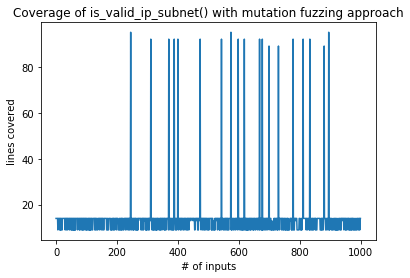

In [52]:
# Plot for pure random approach

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with smart mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')


# Credit Card Validator

In [ ]:
# luhn algorithm


class CreditCard:
    def __init__(self, card_no):
        self.card_no = card_no

    @property
    def company(self):
        comp = None
        if str(self.card_no).startswith('4'):
            comp = 'Visa Card'
        elif str(self.card_no).startswith(('50', '67', '58', '63',)):
            comp = 'Maestro Card'
        elif str(self.card_no).startswith('5'):
            comp = 'Master Card'
        elif str(self.card_no).startswith('37'):
            comp = 'American Express Card'
        elif str(self.card_no).startswith('62'):
            comp = 'Unionpay Card'
        elif str(self.card_no).startswith('6'):
            comp = 'Discover Card'
        elif str(self.card_no).startswith('35'):
            comp = 'JCB Card'
        elif str(self.card_no).startswith('7'):
            comp = 'Gasoline Card'

        return 'Company : ' + comp

    def first_check(self):
        if 13 <= len(self.card_no) <= 19:
            message = "First check : Valid in terms of length."

        else:
            message = "First check : Check Card number once again it must be of 13 or 16 digits long."
        return message

    def validate(self):
        # double every second digit from right to left
        sum_ = 0
        crd_no = self.card_no[::-1]
        for i in range(len(crd_no)):
            if i % 2 == 1:
                double_it = int(crd_no[i]) * 2

                if len(str(double_it)) == 2:
                    sum_ += sum([eval(i) for i in str(double_it)])

                else:
                    sum_ += double_it

            else:
                sum_ += int(crd_no[i])

        if sum_ % 10 == 0:
            response = "Valid Card"
        else:
            response = 'Invalid Card'

        return response

    @property
    def checksum(self):
        return '#CHECKSUM# : ' + self.card_no[-1]

    @classmethod
    def set_card(cls, card_to_check):
        return cls(card_to_check)


card_number = input()
card = CreditCard.set_card(card_number)
print(card.company)
print('Card : ', card.card_no)
print(card.first_check())
print(card.checksum)
print(card.validate())

# 79927398713
# 4388576018402626
# 379354508162306


# RSA algorithm

In [ ]:

import random
max_PrimLength = 1000000000000

'''
calculates the modular inverse from e and phi
'''
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

'''
calculates the gcd of two ints
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
checks if a number is a prime
'''
def is_prime(num):
    if num == 2:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

def generateRandomPrim():
    while(1):
        ranPrime = random.randint(0,max_PrimLength)
        if is_prime(ranPrime):
            return ranPrime

def generate_keyPairs():
    p = generateRandomPrim()
    q = generateRandomPrim()
    
    n = p*q
    print("n ",n)
    '''phi(n) = phi(p)*phi(q)'''
    phi = (p-1) * (q-1) 
    print("phi ",phi)
    
    '''choose e coprime to n and 1 > e > phi'''    
    e = random.randint(1, phi)
    g = gcd(e,phi)
    while g != 1:
        e = random.randint(1, phi)
        g = gcd(e, phi)
        
    print("e=",e," ","phi=",phi)
    '''d[1] = modular inverse of e and phi'''
    d = egcd(e, phi)[1]
    
    '''make sure d is positive'''
    d = d % phi
    if(d < 0):
        d += phi
        
    return ((e,n),(d,n))
        
def decrypt(ctext,private_key):
    try:
        key,n = private_key
        text = [chr(pow(char,key,n)) for char in ctext]
        return "".join(text)
    except TypeError as e:
        print(e)

def encrypt(text,public_key):
    key,n = public_key
    ctext = [pow(ord(char),key,n) for char in text]
    return ctext

if __name__ == '__main__':
    public_key,private_key = generate_keyPairs() 
    print("Public: ",public_key)
    print("Private: ",private_key)
    
    ctext = encrypt("Heya",public_key)
    print("encrypted  =",ctext)
    plaintext = decrypt(ctext, private_key)
    print("decrypted =",plaintext)